In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

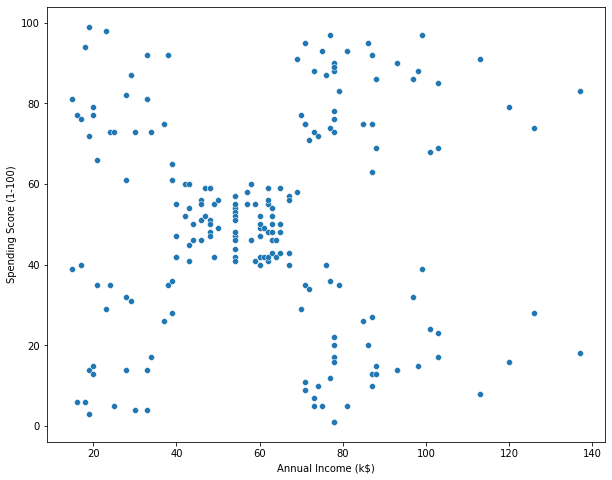

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df ,x='Annual Income (k$)',y='Spending Score (1-100)')

In [17]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
df['Genre'] = df['Genre'].apply(lambda x : 1 if x=='Male' else 0)

In [19]:
df.head(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

In [24]:
X = df.drop('CustomerID' , axis=1)

In [25]:
scaled_val = sc.fit_transform(X)

In [28]:
X.head(2)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81


In [29]:
from sklearn.cluster import KMeans

In [50]:
model = KMeans(n_clusters=4,random_state=100)

In [51]:
new = model.fit_predict(scaled_val)

In [52]:
new

array([0, 0, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 0, 1, 0, 3, 2, 3, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 3, 2, 3, 0, 1, 2, 1, 2, 1, 2, 1, 0, 3, 2,
       1, 2, 1, 2, 2, 2, 1, 0, 2, 3, 1, 3, 1, 3, 2, 3, 3, 0, 1, 1, 3, 0,
       1, 1, 0, 2, 3, 1, 1, 1, 3, 0, 1, 3, 2, 1, 3, 0, 3, 1, 2, 3, 1, 2,
       2, 1, 1, 0, 3, 1, 2, 0, 1, 2, 3, 0, 2, 1, 3, 0, 3, 2, 1, 3, 3, 3,
       3, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 3, 0, 3, 0, 3, 0,
       2, 2, 3, 2, 1, 0, 3, 2, 1, 0, 2, 2, 3, 0, 3, 2, 1, 0, 3, 0, 1, 2,
       1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 0, 3, 0, 3, 0, 1, 2,
       3, 0, 3, 0, 1, 2, 3, 2, 1, 0, 1, 0, 1, 2, 1, 2, 3, 2, 1, 2, 1, 0,
       3, 0], dtype=int32)

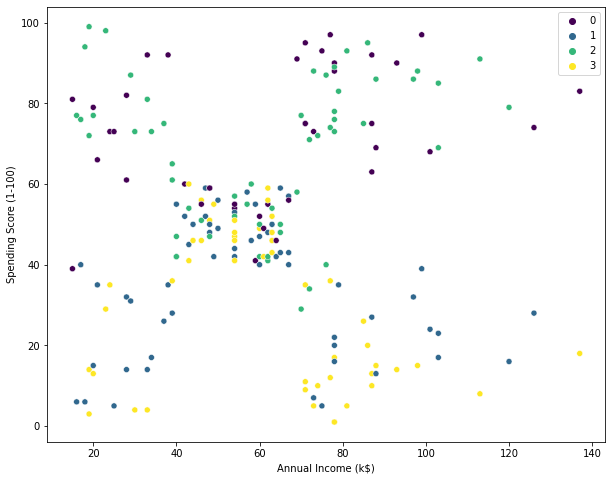

In [53]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df ,x='Annual Income (k$)',y='Spending Score (1-100)',hue=new,palette='viridis')
centers = model.cluster_centers_
# sns.scatterplot(x=centers['Annual Income (k$)'], y=centers['Spending Score (1-100)'], c='black', s=200, alpha=0.5);

In [56]:

wcss = []
for i in range(1, 40):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    model.fit(X)
    wcss.append(model.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


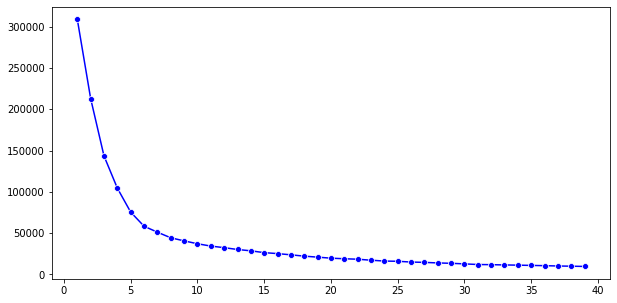

In [59]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 40), wcss,marker='o',color='blue')

In [66]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [67]:
centers = model.cluster_centers_

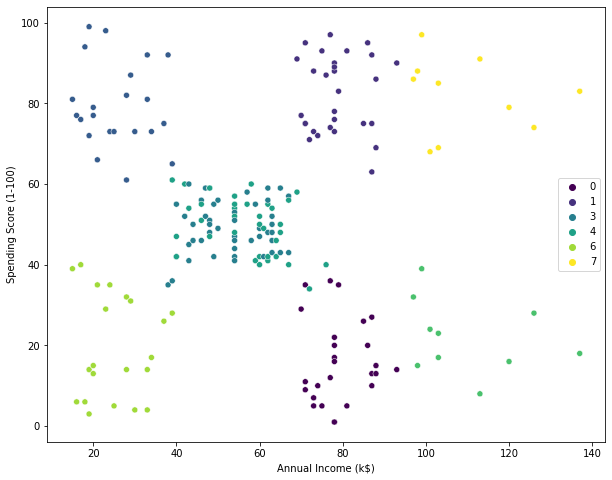

In [73]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df ,x='Annual Income (k$)',y='Spending Score (1-100)',hue=y_kmeans,palette='viridis')
centers = model.cluster_centers_
